# <font color='#15B01A'> **Personal Project Report on a Teleco churn rate**</font>

### Problem Statements

Telcommunication customer churn refers to the rate at which customers of a telecommunications company switch to another provider or terminate their service altogether. High churn rates can be costly for a telco company as it can result in a loss of revenue, increased marketing costs to acquire new customers, and decreased customer satisfaction.

To address telco customer churn, telecommunication companies can implement a variety of strategies such as improving customer service, providing better pricing plans, offering value-added services, and improving network quality. Additionally, telco companies can use data analysis and machine learning algorithms to identify customers who are at high risk of churning and develop targeted retention strategies to retain them.

Some common factors that can contribute to customer churn in the telcommunication industry include poor network quality, high prices, lack of customer engagement, and inadequate customer service. Understanding these factors and addressing them proactively can help telcommunication reduce their churn rate and improve customer retention.

The dataset named "Telco customer churn" was extracted from https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download for this project. It is a collection of data related to customers of a telecommunications company and whether they ended their service (churned) or did not end their services. 

The problem statements of interest for this project is to predict customers who will leave the company.



### Target Audience

The target audience for this project is the telecommunication industry to give an insight of how to reduce their customer churn rate and improve customer retention. 

Jupyter notebook is the tool chosen for visualization. The use of jupyter notebook allows an easy use of python programming language and its useful visualization libraries such as matplotlib.pyplot to visualize the Telco Customer Churn dataset. 

Through visualization, the following are achieved.
1. To know the percentage(%) of customers that churned and customers in active services 
2. To visualize the pattern between customer churn and gender
3. To show a visual representation of any patterns in customer churn and type of Internet services provided 
4. To visualize which of the Internet service is the most profitable.
5. To show what factors contribute to customer churn.


## <font color=#EE7600> **Data Reading, Cleaning and Preprocessing** </font>

In [157]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [158]:
# reading the dataset

notclean_df = pd.read_csv("Telco-Customer-Churn.csv" ,na_values=['?','NA','--','n/a'])

In [159]:
#Shape of the dataset.

notclean_df.shape

(7043, 21)

In [160]:
notclean_df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [161]:
notclean_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [162]:
# checking datatypes of variables to see if a data type has to be changed.

notclean_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [165]:
#converting Total Charges to numerical data type.

notclean_df.TotalCharges = pd.to_numeric(notclean_df.TotalCharges, errors='coerce')

In [167]:
# confirm the variable 'TotalCharge' data type has changed.

notclean_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [172]:
#checking the missing values in each column of the dataset

notclean_df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### From the output above it shows that the attribute 'TotalCharges' has 11(Eleven) missing values.

In [173]:
#create a mask for the rows with any missing value

Missing_values = notclean_df.isnull().any(axis = 1)

#get the indexes of these rows 

missingRowIndx = np.where(Missing_values)
missingRowIndx

(array([ 488,  753,  936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754],
       dtype=int64),)

In [176]:
#use the index to list the rows

notclean_df.iloc[missingRowIndx][:5]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No


In [177]:
# To replace our missing values with zeros.

cleanFilled = notclean_df.fillna(value=0)

In [178]:
# To locate the rows of the missing values 

cleanFilled.iloc[missingRowIndx][:11]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No


In [179]:
# Confirming that there are no missing values in the dataset.

cleanFilled.isna().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [180]:
#storing the clean dataset.

clean_df = cleanFilled


<p style='text-align: center;'> Description of attributes and their types </P>

| Attributes    | Description                                                         | Attribute Type |
| :------------ | :------------------------------------------------------------------   | :------------: |
| customerID    | A unique value identifying customer                                   | Categorical    |
| gender        | Whether the customer is a male or a female                            | Categorical    |
| SeniorCitizen | Whether the customer is a senior citizen or not (1, 0)                | Categorical    |
| Partner       | Whether the customer has a partner or not (Yes, No)                   | Categorical    |
| Dependents    | Whether the customer has dependents or not (Yes, No)                  | Categorical    |
| tenure        | Number of months the customer has stayed with the company             | Numerical      |
| PhoneService  | Whether the customer has a phone service or not (Yes, No)              | Categorical    |
| MultipleLines | Whether the customer has multiple lines or not (Yes, No, No phone service) | Categorical |
| InternetService | Customer’s internet service provider (DSL, Fiber optic, No)          | Categorical    |
| OnlineSecurity | Whether the customer has online security or not (Yes, No, No internet service) | Categorical |
| OnlineBackup  | Whether the customer has online backup or not (Yes, No, No internet service) | Categorical |
| DeviceProtection | Whether the customer has device protection or not (Yes, No, No internet service) | Categorical |
| TechSupport   | Whether the customer has tech support or not (Yes, No, No internet service) | Categorical |
| StreamingTV   | Whether the customer has streaming TV or not (Yes, No, No internet service) | Categorical |
| StreamingMovies | Whether the customer has streaming movies or not (Yes, No, No internet service) | Categorical |
| Contract      | Type of contract according to duration (Month-to-month, One year, Two year) | Categorical |
| PaperlessBilling | Bills issued in paperless form (Yes, No)                              | Categorical    |
| PaymentMethod | Payment method used by customer (Electronic check, Mailed check, Credit card (automatic), Bank transfer (automatic)) | Categorical |
| MonthlyCharges | Amount of charge for service on monthly basis                          | Numerical      |
| TotalCharges  | Cumulative charges for service during subscription (tenure) period    | Numerical      |
| Churn         | Output value                                                         | Categorical    |


# <font color=#EE7600> **Dataset Statistical Description and Visualization** </font>

### <font color=#3D59AB> **Dataset Statistical Description** </font>

In [202]:
#Descriptive Statistics of the dataset

clean_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [203]:
# Correlation of the clean dataset

clean_df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.103006
tenure,0.016567,1.000000,0.247900,0.826178
MonthlyCharges,0.220173,0.247900,1.000000,0.651174
TotalCharges,0.103006,0.826178,0.651174,1.000000


### <font color=#3D59AB> **Dataset Statistical Visualization** </font>

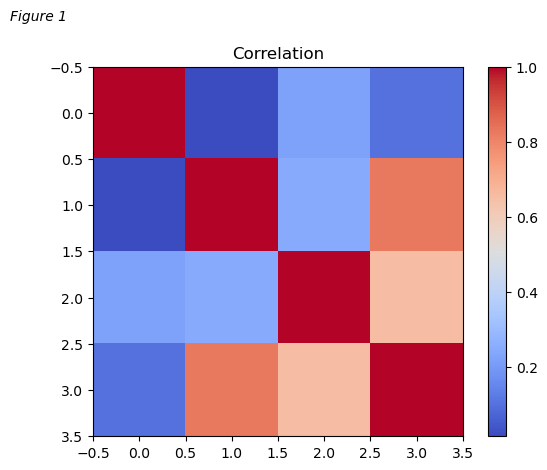

In [207]:
#Visualizing the correlation the dataset.

plt.imshow(clean_df.corr(),cmap='coolwarm') 
plt.colorbar() # to plot a color bar next to the blot to show the mapping between the colors and the values
plt.text(-1.4, -1.0, 'Figure 1', style='italic')
plt.title('Correlation')
plt.savefig('corr.png') # used to save the resulted image in a file

Text(0.5, 1.0, 'Correlation with Churn Rate \n')

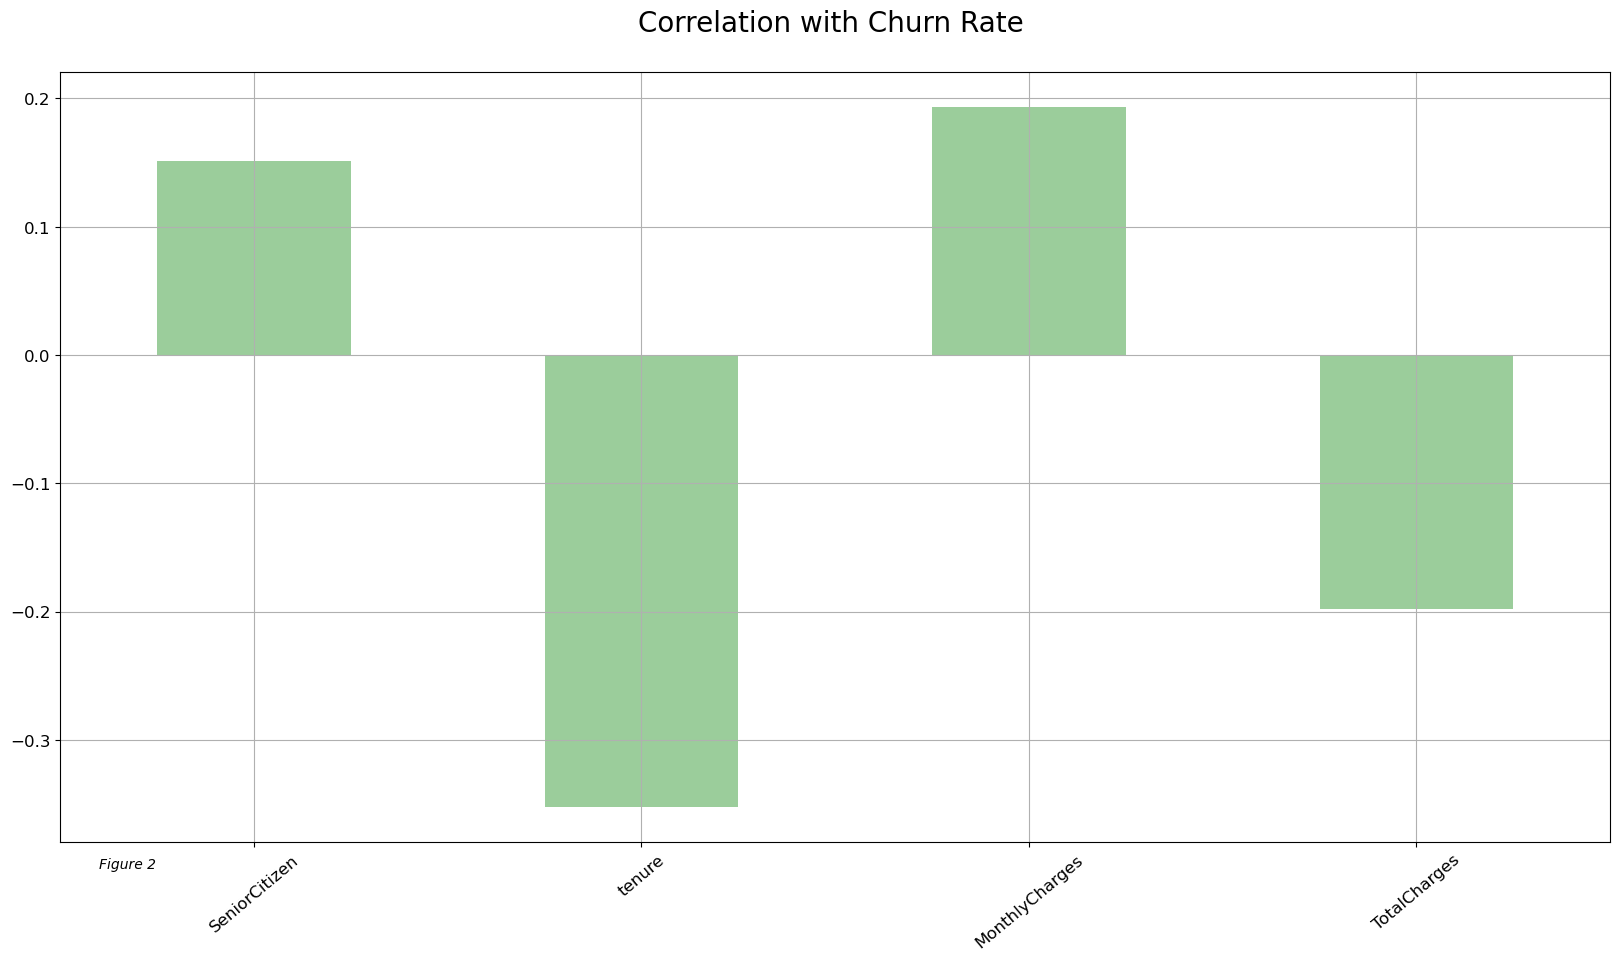

In [242]:
plt.figure()

ds_corr = clean_df[['SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling',
        'MonthlyCharges', 'TotalCharges']]

correlations = ds_corr.corrwith(clean_df.Churn)
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (20, 10),
        fontsize = 12,
        color = '#9BCD9B',
        rot = 40, grid = True)
plt.text(-0.4, -0.4, 'Figure 2', style='italic')
plt.title('Correlation with Churn Rate \n', horizontalalignment="center", fontstyle = "normal", fontsize = "20")

# <font color=#EE7600> **Analyzing the Data Statistics** </font>


From the Telco customer churn dataset, TotalCharges has the highest average of 2279.73 while SeniorCitizen has the lowest average of 0.162. Also, TotalCharge has the largest variability of 2266.79 and SeniorCitizen has the lowest variability of 0.3686. 

Here are some observations from the correlation matrix:

1. SeniorCitizen has a weak positive correlation with MonthlyCharges (0.22), indicating that SeniorCitizens tend to have slightly higher monthly charges.
2. SeniorCitizen has a weak positive correlation with TotalCharges (0.102), indicating that senior citizens tend to have slightly higher TotalCharges.
3. Tenure has a strong positive correlation with TotalCharges (0.826), indicating that customers who have been with the company for a longer time tend to have higher TotalCharges.
4. Tenure has a moderate positive correlation with MonthlyCharges (0.248), indicating that customers who have been with the company for a longer time tend to have slightly higher MonthlyCharges.

However, the correlation matrix suggests that tenure is strongly associated with both MonthlyCharges and total charges, while being a SeniorCitizen only has a weak association with other variables.

### <font color=#3D59AB> **Reason for The Preprocessing Techniques Applied** </font>

Preprocessing techniques were used to clean the telco customer churn dataset. There are 7,043 customer records in the dataset, with 21 columns including gender, age range, internet service, monthly charges, and tenure. To deal with the missing values identified in the 'TotalCharges' attribute, the missing values were replaced with zeros(0). Also, totalcharges data type was changed from object to float as it is a numeric attribute.

# <font color=#EE7600> **Data Visualization** </font>

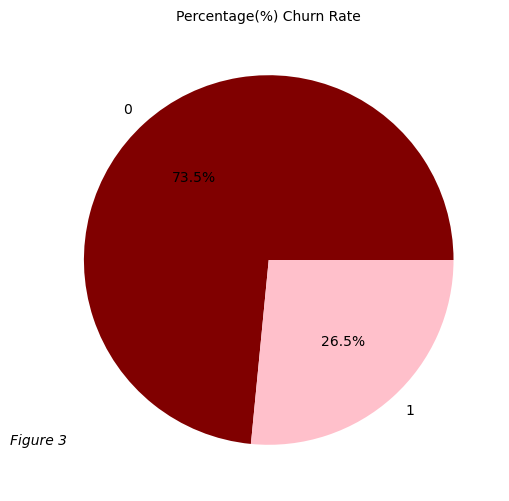

In [247]:
# A visual representation of the general churn rate in the data set
Churn = ['Yes', 'No']
colors =("maroon", "pink")
plt.figure(figsize=(6,6))
plt.pie(clean_df.Churn.value_counts(), labels=clean_df.Churn.value_counts().index, autopct='%1.1f%%', colors=colors)
plt.title("Percentage(%) Churn Rate", fontsize=10)
plt.text(-1.4, -1.0, 'Figure 3', style='italic')
# show the plot
plt.show()

In [219]:
# Define mapping of 'No' and 'Yes' to 0 and 1
mapping = {'No': 0, 'Yes': 1}

# Use map() function to convert 'Churn' column to numerical values
clean_df['Churn'] = clean_df['Churn'].map(mapping)

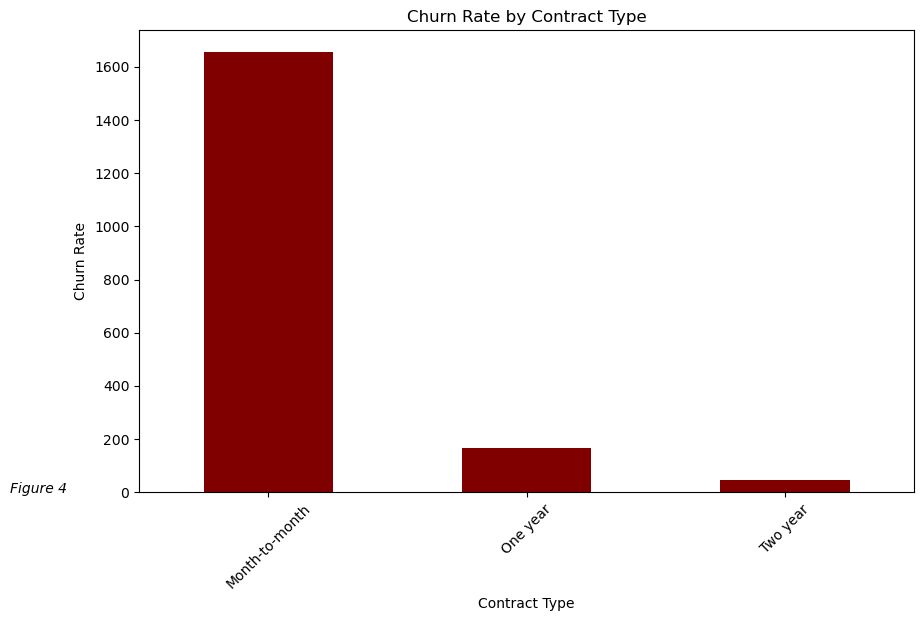

In [248]:
# Calculate churn rate by contract type

churn_rates_by_contract = clean_df.groupby('Contract')['Churn'].sum()

# Create a bar chart to visualize churn rate by contract type
plt.figure(figsize=(10, 6))
churn_rates_by_contract.plot(kind='bar', color='maroon')
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.text(-1.0, -1.0, 'Figure 4', style='italic')
plt.show()

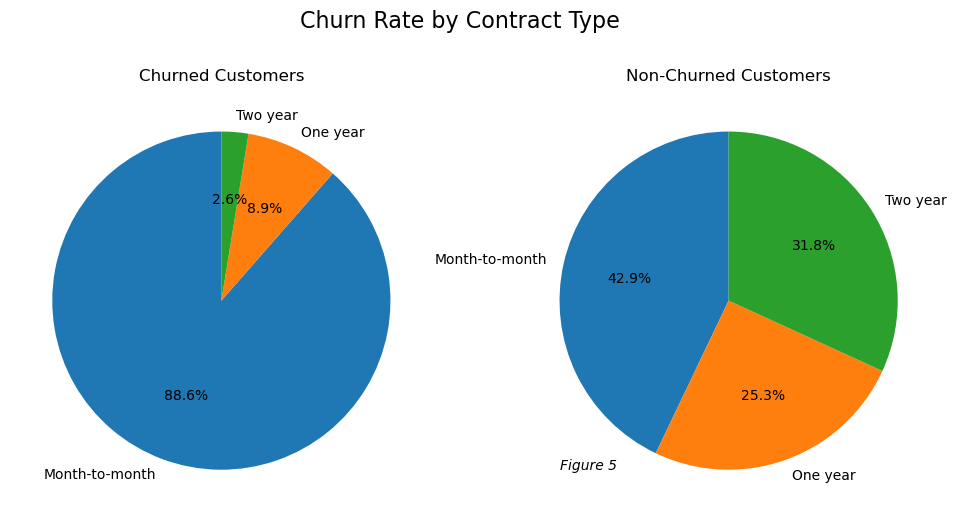

In [250]:
#The pie chart visuals for churn rate by contract type.
# Groupby contract type and churn label, and count the number of customers
churn_counts = clean_df.groupby(['Contract', 'Churn'])['customerID'].count().reset_index()

# Create a pie chart for each churn label using subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns for subplots
fig.suptitle('Churn Rate by Contract Type', fontsize=16)

# Filter data for churned and non-churned customers
churned_data = churn_counts[churn_counts['Churn'] == 1]
non_churned_data = churn_counts[churn_counts['Churn'] == 0]

# Plot pie chart for churned customers
axs[0].pie(churned_data['customerID'], labels=churned_data['Contract'], autopct='%1.1f%%', startangle=90)
axs[0].set_title('Churned Customers')

# Plot pie chart for non-churned customers
axs[1].pie(non_churned_data['customerID'], labels=non_churned_data['Contract'], autopct='%1.1f%%', startangle=90)
axs[1].set_title('Non-Churned Customers')

plt.text(-1.0, -1.0, 'Figure 5', style='italic')
plt.show()


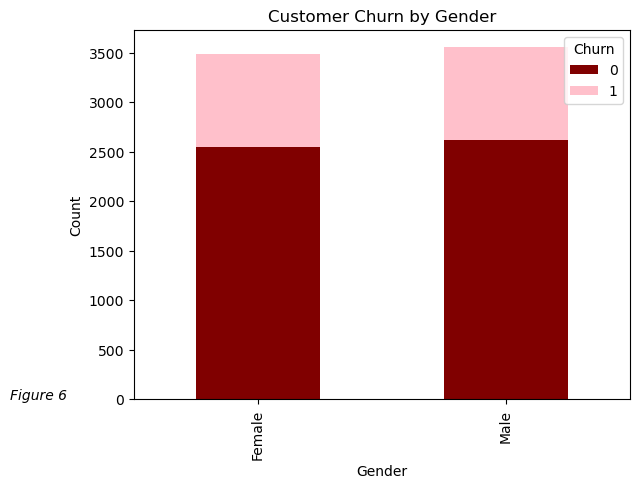

In [251]:
# Customer churn by gender
gender_churn_counts = clean_df.groupby(['gender', 'Churn'])['customerID'].count().unstack()
color= ('maroon', 'pink')
gender_churn_counts.plot(kind='bar', stacked=True, color=color)
plt.title('Customer Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.text(-1.0, -1.0, 'Figure 6', style='italic')
plt.show()

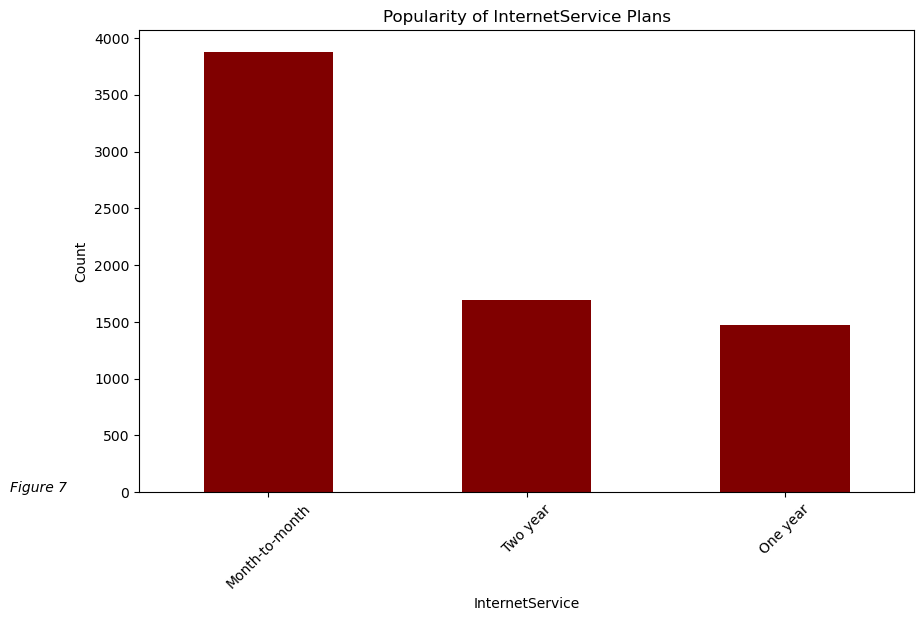

                   Churn  MonthlyCharges  TotalCharges
Contract                                              
Month-to-month  0.427097       66.398490   1369.254581
One year        0.112695       65.048608   3032.622878
Two year        0.028319       60.770413   3706.934336


In [252]:
# Visualization of most popular service plans
# Calculate the count of each service plan
service_plan_counts = clean_df['Contract'].value_counts()

# Create a bar chart to visualize the popularity of service plans
plt.figure(figsize=(10, 6))
service_plan_counts.plot(kind='bar', color='maroon')
plt.title('Popularity of InternetService Plans')
plt.xlabel('InternetService')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.text(-1.0, -1.0, 'Figure 7', style='italic')
plt.show()

# Calculate metrics (e.g., churn rate, average monthly charges, etc.) by service plan
service_plan_metrics = clean_df.groupby('Contract').agg({
    'Churn': 'mean',
    'MonthlyCharges': 'mean',
    'TotalCharges': 'mean'
})

# Print the calculated metrics by service plan
print(service_plan_metrics)

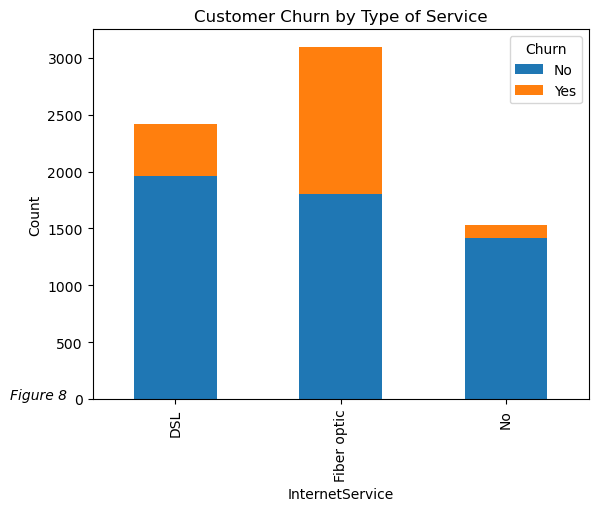

In [253]:
# Create a bar chart of customer churn by type of service

service_churn_counts = data_set.groupby(['InternetService', 'Churn'])['customerID'].count().unstack()
service_churn_counts.plot(kind='bar', stacked=True)
plt.title('Customer Churn by Type of Service')
plt.xlabel('InternetService')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.text(-1.0, -1.0, 'Figure 8', style='italic')
plt.show()

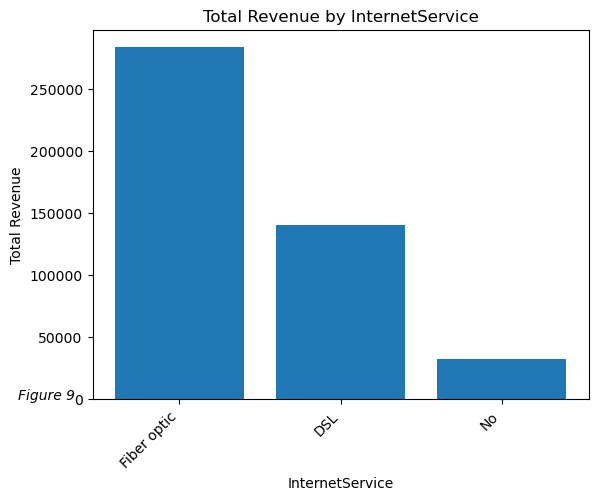

In [254]:
# Calculate the total revenue for each service
service_revenue = clean_df.groupby('InternetService')['MonthlyCharges'].sum().sort_values(ascending=False)

# Create a bar chart of service revenue
plt.bar(service_revenue.index, service_revenue.values)
plt.title('Total Revenue by InternetService')
plt.xlabel('InternetService')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.text(-1.0, -1.0, 'Figure 9', style='italic')
plt.show()

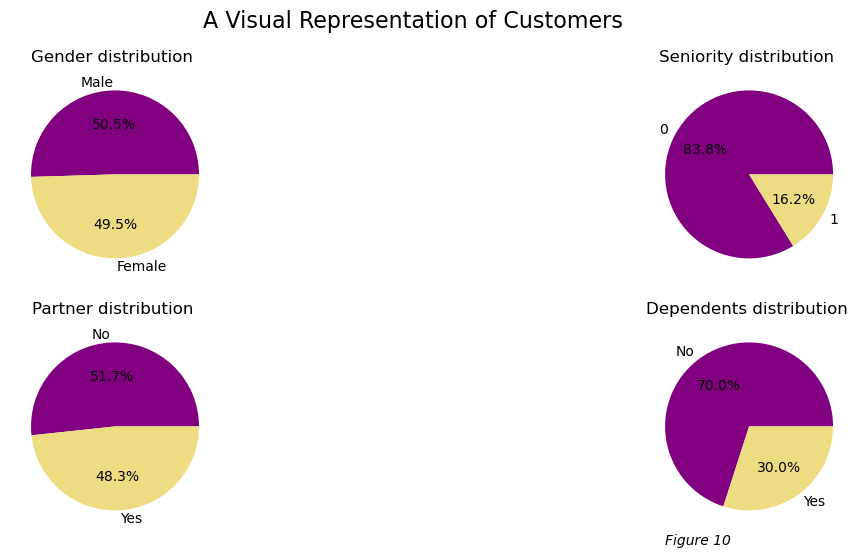

In [256]:
# Customer Demographics

fig, ax = plt.subplots(2, 2,figsize=(15,6), subplot_kw=dict(aspect="equal"))
color1 = ('purple', '#EEDC82')

# create the pie charts in each subplot

ax[0, 0].pie(clean_df.gender.value_counts(), labels=clean_df.gender.value_counts().index, autopct='%1.1f%%', colors=color1)
ax[0, 1].pie(clean_df.SeniorCitizen.value_counts(), labels=clean_df.SeniorCitizen.value_counts().index, autopct='%1.1f%%', colors=color1)
ax[1, 0].pie(clean_df.Partner.value_counts(), labels=clean_df.Partner.value_counts().index, autopct='%1.1f%%', colors=color1)
ax[1, 1].pie(clean_df.Dependents.value_counts(), labels=clean_df.Dependents.value_counts().index, autopct='%1.1f%%', colors=color1)

# adding a title to the figure

ax[0, 0].set_title("Gender distribution ")
ax[0, 1].set_title("Seniority distribution ")
ax[1, 0].set_title("Partner distribution ")
ax[1, 1].set_title("Dependents distribution ")

plt.suptitle("A Visual Representation of Customers", fontsize=16)

plt.text(-1.0, -1.4, 'Figure 10', style='italic')
# display the figure

plt.show()

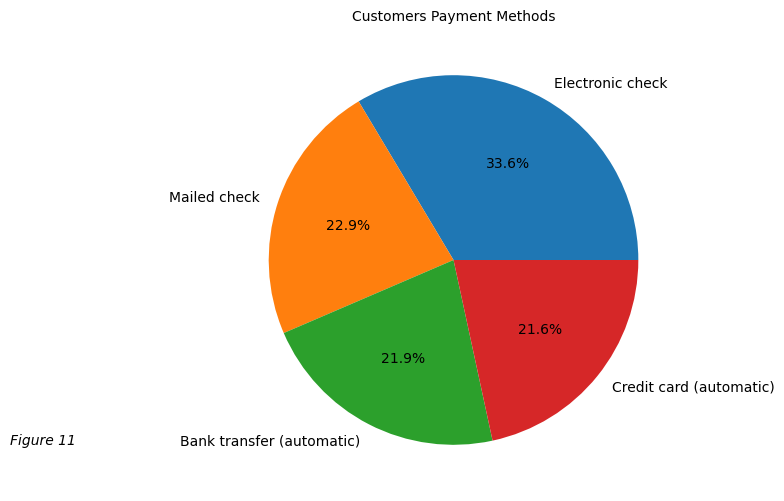

In [259]:
# A visual of the Customer data

plt.figure(figsize=(6,6))
plt.pie(clean_df.PaymentMethod.value_counts(), labels=clean_df.PaymentMethod.value_counts().index, autopct='%1.1f%%')
plt.title("Customers Payment Methods", fontsize=10)
plt.text(-2.4, -1.0, 'Figure 11', style='italic')
# show the plot
plt.show()

## <font color=#EE7600> **The questions I asked about the Dataset and How Visualization Answered the Questions** </font>

#### To know the percentage(%) of customers that churned and customers in active services:

I figured out what factors have the greatest impact on the churn of customers from the service. Churn customers are customers who have stopped using the service.From Figure 3, I introduced a metric- the churn rate (the percentage of customers who churned), and looked at the metric in terms of the characteristics of the customers.  Among the customers in the dataset, 26.5% of customers are most likely to churn and have stopped using the company's services while 73.5% are still in active service.
Speaking from a business perspective, understanding the reasons for the outflow of customers is critically an important task. And the ability to predict that a customer may churn can help retain customers and profits.

#### What factor contribute to customer churn:

One of the factors that affect customer churn that I observed in this project is contract type. Based on the visualization in figure 5 my finding shows that 88.6% of customers who left the service had a Month-to-month contract type. However, longer types of contracts imply penalties for early termination of the contract.

#### Which of the internet services was profitable:

Based on my findings from figure 9 visualization, I can depict that fibre optic has the highest revenue generation while the DSL has a lesser income generation for the telcommunication company.

#### <font color=#EE7600> **Interesting Information I Discovered** </font>

An interesting information discovered in the data set as shown in figure 9 is that fiber optic has the highest revenue generation but it is funny how figure 8 shows that customers who are subscribe to fiber optic plan are most likely to churn than customer that are subscribed to churn. Since fiber optic plan generates more revenue it is best for the company to pay close attention to the customers and how services are being provided to them.

### <font color=#EE7600> **Descriptions, Discussions, and Conclusions of Results** </font>

Presently telecom market is facing severe competition. Customer churn prediction has become an important issue of customer relationship management to retain valuable customers. Therefore by performing research, key factors of churn to retain customers and their influence on churn will be well understood.

Proper churn management can save a huge amount of money for the company. Thus the economic value of customer retention can be summarized as:

1. Satisfied customers can bring new customers
2. Long-term customers usually do not get influenced much by competitors
3. Company can focus on satisfying existing customer’s needs
4. Lost customers share negative experiences and this will have a negative influence on the image of the company
